In [1]:
# konlpy : 한국어 형태소 분석기
!pip install konlpy


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install jpype1


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# 워드 클라우드
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

!pip install Counter

  Using cached Counter-1.0.0.tar.gz (5.2 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      Traceback (most recent call last):
        File "C:\Users\admin\Desktop\Daeun-ai\08 Data-Analysis-Python\source\basic\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
        File "C:\Users\admin\Desktop\Daeun-ai\08 Data-Analysis-Python\source\basic\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\admin\Desktop\Daeun-ai\08 Data-Analysis-Python\source\basic\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 143, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\admin\

In [5]:
!pip freeze > requirements.txt

In [4]:
import requests
from bs4 import BeautifulSoup as bs

html = requests.get("https://news.naver.com/").text
soup = bs(html, 'html.parser')

body = soup.select_one("body")

# 불필요한 키워드는 제거할 것

text = body.get_text().strip().replace("\n", " ")
stopwords = ['본문', '바로가기', 'NAVER', '검색', '이슈', '닫기', '구독'] # 불용어

text

'본문 바로가기        NAVER  뉴스   엔터     스포츠     날씨     프리미엄     대선           검색             언론사별 정치 경제 사회 생활/문화 IT/과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 알고리즘 안내 정정보도 모음              콘텐츠   6.5(목)   전체 언론사 뉴스스탠드 라이브러리           언론사편집  기자                                                 연재                                                                  구독설정                                       속보     코스피 11개월 만에 장중 2800선 돌파    한국일보       코스피 장중 2800선 돌파…10개월여만    국민일보  내용작성전      코스피 이틀째 급등…2,800선도 돌파    연합뉴스TV       트럼프 “하버드대 다니려는 외국 학생 입국 제한 필요”    헤럴드경제       코스피, 장중 2800선 돌파    파이낸셜뉴스  내용작성전      \'이재명 랠리\' 코스피 2800돌파…환율도 1350원대    노컷뉴스       외국인 매수에 코스피 2,800선 돌파...연고점 재경신    YTN  내용작성전      SK하이닉스 ‘불기둥’, 코스피 장중 2800선 돌파…10개월여만    서울신문       조희대, 대법관 증원법에 “공론장 마련 희망…국회와 계속협의”    국제신문       트럼프 "하버드대 다니려는 외국 학생 입국 제한 필요"    TV조선  내용작성전      코스피 장중 2800선 돌파…10개월여만    아시아경제  내용작성전      코스피 장중 2800선 돌파…10개월여만    매일경제  내용작성전      코스피 장중 2800선 돌파…10개월여만    SBS Biz  내용작성전      김민석 “지금은 제2의 IMF… 민생과 통합 매일 

### konlpy.tag.Okt
- Okt (Open Korean Text): KoNLPy에서 제공하는 한국어 형태소 분석기
- `morphs(텍스트)` : 형태소 단위로 텍스트를 분리, 단어 단위로 분리된 리스트 반환
- pos(text, norm=False, stem=False) : 형태로를 분리할 때 품사(명사, 동사, 형용사, 조사, ...) 정보를 함께 반환 / part of speech (품사)
    - norm=True : 문장을 정규화 ("ㅋㅋ" -> "ㅋ")
    - stem=True: 어간 추출 ("먹었다" -> "먹다)

> 형태소: 의미를 가진 최소 단위

In [5]:
from konlpy.tag import Okt  # 트위터가 만든 형태 분석기
okt = Okt()

In [6]:
okt.morphs("나는 멋진 학원에 갑니다.")

['나', '는', '멋진', '학원', '에', '갑니다', '.']

In [7]:
okt.pos("나는 멋진 학원에 갑니다.")

[('나', 'Noun'),
 ('는', 'Josa'),
 ('멋진', 'Adjective'),
 ('학원', 'Noun'),
 ('에', 'Josa'),
 ('갑니다', 'Verb'),
 ('.', 'Punctuation')]

In [8]:
words = okt.pos(text)
words[:10]

[('본문', 'Noun'),
 ('바로가기', 'Noun'),
 ('NAVER', 'Alpha'),
 ('뉴스', 'Noun'),
 ('엔터', 'Noun'),
 ('스포츠', 'Noun'),
 ('날씨', 'Noun'),
 ('프리미엄', 'Noun'),
 ('대선', 'Noun'),
 ('검색', 'Noun')]

In [9]:
# 품사 별로 토큰화
words = []
for word, pos in okt.pos(text):
    if word not in stopwords and pos in ['Noun', 'Verb', 'Adjective']:
        words.append(word)
words[:10]

['뉴스', '엔터', '스포츠', '날씨', '프리미엄', '대선', '언론', '사별', '정치', '경제']

## ["키워드": 등장횟수] 형태로 가공하자!

In [11]:
from collections import Counter

stat = Counter(words)
stat

Counter({'이재명': 91,
         '대통령': 90,
         '정부': 47,
         '속보': 42,
         '신문': 37,
         '코스피': 37,
         '법': 34,
         '돌파': 33,
         '보기': 30,
         '선': 30,
         '대법관': 29,
         '조희': 28,
         '증원': 28,
         '해보세요': 28,
         '국민': 27,
         '것': 27,
         '장': 25,
         '관심': 25,
         '대선': 24,
         '트럼프': 24,
         '김민석': 24,
         '개월': 23,
         '일보': 23,
         '공론장': 23,
         '마련': 23,
         '경제': 22,
         '희망': 22,
         '국회': 22,
         '경호': 22,
         '이': 21,
         '만': 20,
         '협의': 20,
         '의': 19,
         '대': 19,
         '민생': 17,
         '경찰': 17,
         '명': 17,
         '제': 16,
         '뉴스': 15,
         '새': 14,
         '모두': 14,
         '총리': 14,
         '기자': 13,
         '계속': 13,
         '통합': 13,
         '첫': 13,
         '원전': 13,
         '할': 13,
         '힘': 13,
         '상황': 12,
         '철수': 12,
         '등': 12,
         '언론': 11,

In [12]:
# most_common(숫자) : 가장 카운트가 많은 숫자 개수 만큼
stat = Counter(words).most_common(50)
stat

[('이재명', 91),
 ('대통령', 90),
 ('정부', 47),
 ('속보', 42),
 ('신문', 37),
 ('코스피', 37),
 ('법', 34),
 ('돌파', 33),
 ('보기', 30),
 ('선', 30),
 ('대법관', 29),
 ('조희', 28),
 ('증원', 28),
 ('해보세요', 28),
 ('국민', 27),
 ('것', 27),
 ('장', 25),
 ('관심', 25),
 ('대선', 24),
 ('트럼프', 24),
 ('김민석', 24),
 ('개월', 23),
 ('일보', 23),
 ('공론장', 23),
 ('마련', 23),
 ('경제', 22),
 ('희망', 22),
 ('국회', 22),
 ('경호', 22),
 ('이', 21),
 ('만', 20),
 ('협의', 20),
 ('의', 19),
 ('대', 19),
 ('민생', 17),
 ('경찰', 17),
 ('명', 17),
 ('제', 16),
 ('뉴스', 15),
 ('새', 14),
 ('모두', 14),
 ('총리', 14),
 ('기자', 13),
 ('계속', 13),
 ('통합', 13),
 ('첫', 13),
 ('원전', 13),
 ('할', 13),
 ('힘', 13),
 ('상황', 12)]

In [14]:
# 폰트 불러오기: ../my_fonts/NanumGothic-ExtraBold.ttf
from wordcloud import WordCloud

In [15]:
wc = WordCloud(font_path='../my_fonts/NanumGothic-ExtraBold.ttf', 
                background_color='white', 
                max_font_size=200,
                width=700, height=450)
cloud = wc.generate_from_frequencies(dict(stat))

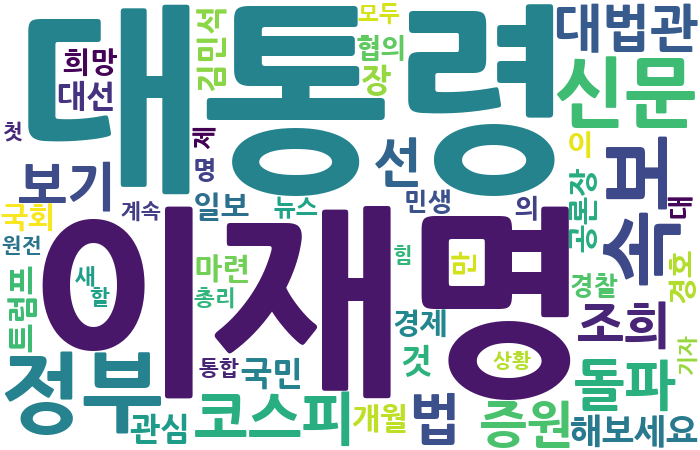

In [16]:
cloud.to_image()

In [17]:
# 워드 클라우드 이미지를 파일로 저장
from time import strftime
cloud.to_file(f"{strftime('%Y%m%d%H')}_news.jpg")